<a target="_blank" href="https://colab.research.google.com/github/cohere-ai/notebooks/blob/main/notebooks/Introduction_to_RAG.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Introduction to RAG

This notebook shows a quickstart example on how to build a RAG-powered chatbot with the Cohere's Chat endpoint. The chatbot can extract relevant information from external documents and produce verifiable, inline citations in its responses.

The diagram below provides an overview of what we’ll build.


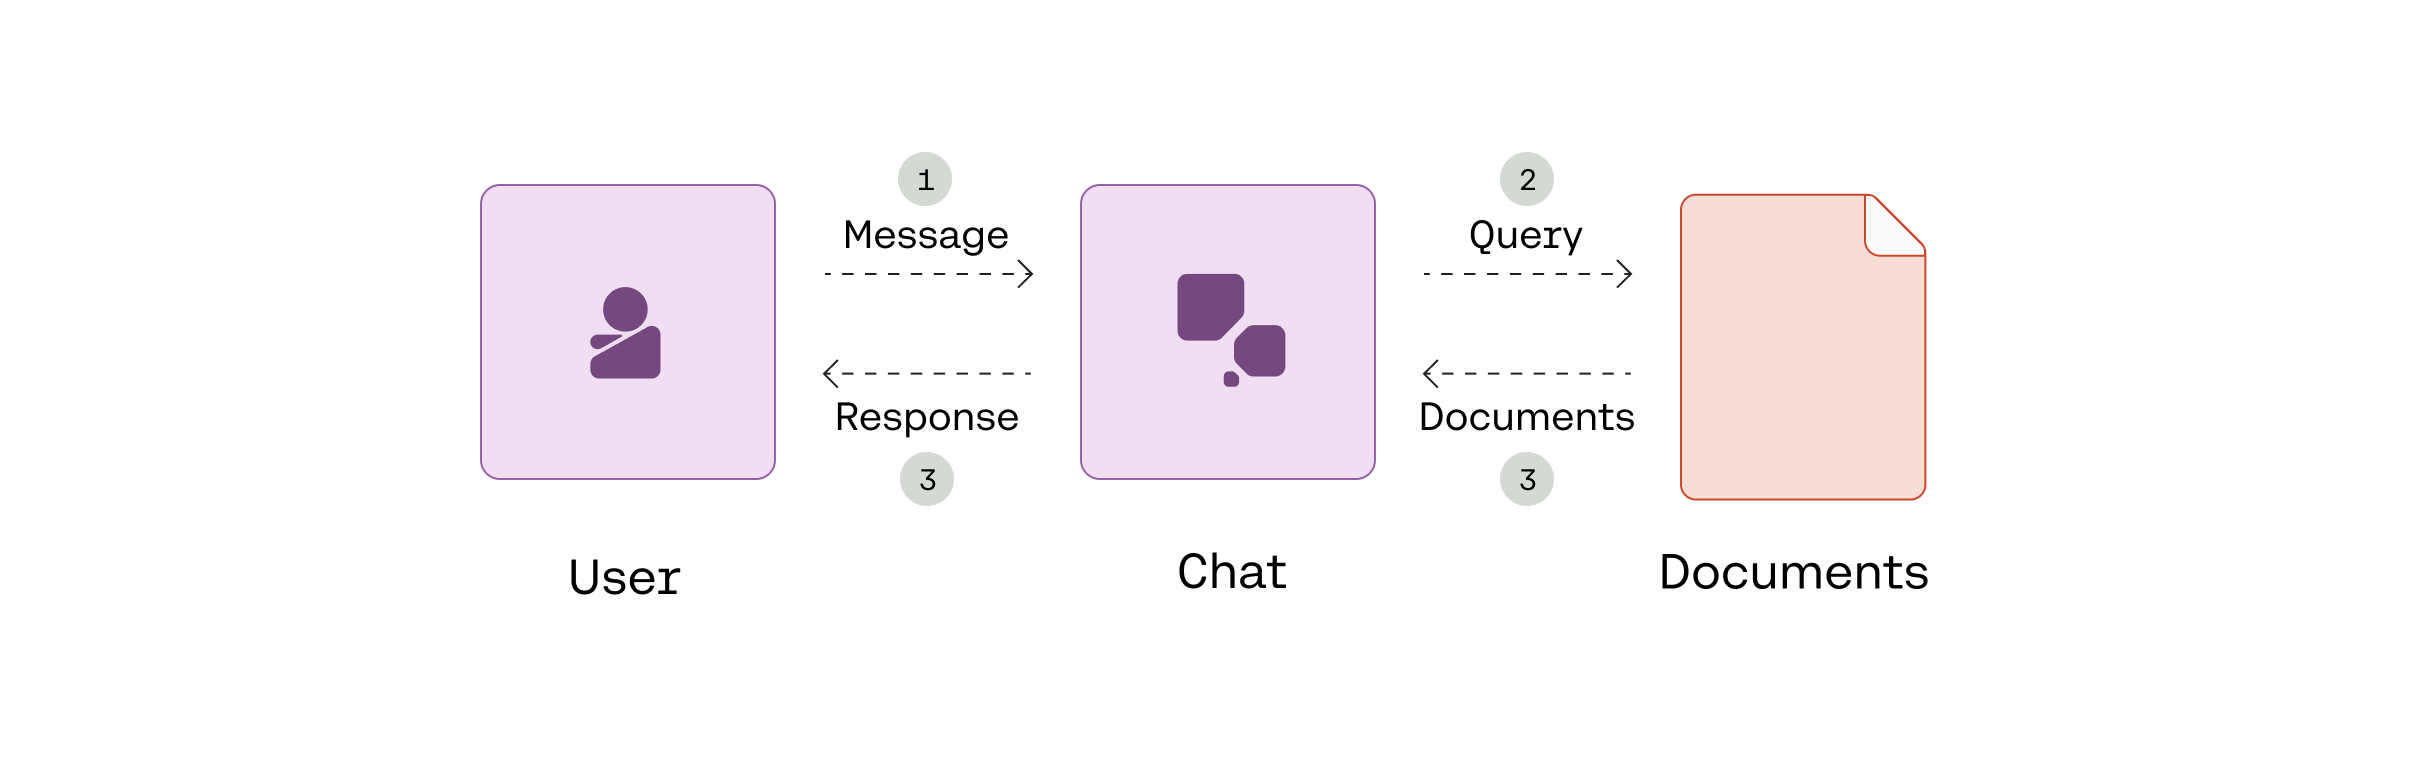

# Setup

In [ ]:
! pip install cohere -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00


In [ ]:
#@title Enable text wrapping in Google Colab

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
import cohere
co = cohere.Client("COHERE_API_KEY") # Get your API key here: https://dashboard.cohere.com/api-keys

# Define documents

We define the documents that we want to ground an LLM’s response with, formatted as a list. In our case, each document consists of two fields: title and text.


In [ ]:
documents = [
    {
        "title": "Tall penguins",
        "text": "Emperor penguins are the tallest."},
    {
        "title": "Penguin habitats",
        "text": "Emperor penguins only live in Antarctica."},
    {
        "title": "What are animals?",
        "text": "Animals are different from plants."}
]

# Generate response with citations

Cohere’s RAG functionalities are part of the Chat endpoint, with the Command model as the underlying LLM. This allows developers to build chatbots that have the full context of a conversation and are not limited to a single interaction.

First, we define the user message. Then we generate the response from the LLM and display it, together with citations and the source documents used.

In [ ]:
# Get the user message
message = "What are the tallest living penguins?"

# Generate the response
response = co.chat_stream(message=message,
                          documents=documents)


# Display the response
citations = []
cited_documents = []

for event in response:
    if event.event_type == "text-generation":
        print(event.text, end="")
    elif event.event_type == "citation-generation":
        citations.extend(event.citations)
    elif event.event_type == "search-results":
        cited_documents = event.documents

# Display the citations and source documents
if citations:
  print("\n\nCITATIONS:")
  for citation in citations:
    print(citation)

  print("\nDOCUMENTS:")
  for document in cited_documents:
    print(document)

The tallest living species of penguin is the emperor penguin (Apteryx australis), which can measure up to 1.6 to 1.8 m (5.2 to 6 ft) when fully grown.

CITATIONS:
start=45 end=60 text='emperor penguin' document_ids=['doc_0']
start=61 end=80 text='(Apteryx australis)' document_ids=['doc_0']
start=106 end=118 text='1.6 to 1.8 m' document_ids=['doc_0']
start=119 end=132 text='(5.2 to 6 ft)' document_ids=['doc_0']

DOCUMENTS:
{'id': 'doc_0', 'text': 'Emperor penguins are the tallest.', 'title': 'Tall penguins'}
{'id': 'doc_1', 'text': 'Emperor penguins only live in Antarctica.', 'title': 'Penguin habitats'}
{'id': 'doc_2', 'text': 'Animals are different from plants.', 'title': 'What are animals?'}
